In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# The code to install the required library

# Importing seaborn and reading the Excel file
import seaborn as sns
df = pd.read_excel("analise.xlsx")
Agua = "Consumo_Agua_Litros"
Energia = "Consumo_Energia_kWh"
co2 = "Emissao_Gases_CO2e_kg"
Pais = "País_Fabricante"
Indice = "Indice"
Custo = "Custo_Produção"

Scatter plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o ficheiro Excel
df_novo = pd.read_csv("analise.xlsx")

# Criar scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Custo_Produção", y="Indice", hue="País_Fabricante", palette="tab10", alpha=0.7)

# Configurações do gráfico
plt.xlabel("Custo de Produção")
plt.ylabel("Índice de Sustentabilidade")
plt.title("Relação entre Custo de Produção e Índice de Sustentabilidade por País")
plt.legend(title="País", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


Estatisticas descritivas

In [205]:
# Tabela com medidas descritivas
tabela_descritiva = df.describe(include='all')
# Converter a tabela descritiva em um novo arquivo CSV
tabela_descritiva.to_csv('tabela_descritiva_vendas.csv', index=True, encoding='utf-8')


Base de dados clientes

In [ ]:
df_clientes = pd.read_csv("analise.csv")

df_clientes

,Unnamed: 0.1,Unnamed: 0,Cliente_ID,Detalhes_Reclamações,Histórico_Reclamações,Frequência_Compra,Género,Idade,Método_Pagamento,País,Preferência_Categoria,Score_Fidelidade,sentimento
0,0,0,862909,Demora na resposta; Produto chegou danificado;...,5,Média,F,66,Cartão de Crédito,França,Beleza,7,-0.075000
1,1,1,389766,Reembolso não processado,1,Média,F,43,Débito,Itália,Beleza,10,0.000000
2,2,2,546264,Entrega atrasada,1,Média,F,65,Transferência Bancária,Portugal,Moda,8,0.000000
3,3,3,237058,Reembolso não processado; Produto diferente do...,3,Média,M,26,Cartão de Crédito,Portugal,Beleza,7,-0.033333
4,4,4,870194,NaN,0,Alta,M,41,Cartão de Crédito,Itália,Eletrónica,10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2985,2985,457824,Produto chegou danificado,1,Alta,M,62,PayPal,Itália,Eletrónica,3,0.000000
2986,2986,2986,350856,NaN,0,Baixa,M,31,Transferência Bancária,Itália,Eletrónica,2,0.000000
2987,2987,2987,356182,Produto diferente do pedido; Qualidade abaixo ...,5,Baixa,M,59,Débito,Itália,Eletrónica,6,-0.020000
2988,2988,2988,762658,NaN,0,Baixa,F,23,Débito,França,Eletrónica,8,0.000000


Remover duplicados

In [207]:
df_clientes = df_clientes.drop_duplicates(subset=['Cliente_ID'], keep=False)
df_clientes.to_csv('clientes.csv', index=False, encoding='utf-8')

PermissionError: [Errno 13] Permission denied: 'clientes.csv'

In [ ]:
# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())
print(df.isna().sum())


Valores nulos por coluna:
Categoria                0
Cliente_ID               0
Consumo_Agua_Litros      0
Consumo_Energia_kWh      0
Custo_Produção           0
Data_Compra              0
Data_Receção             0
Emissao_Gases_CO2e_kg    0
Fabricante               0
País_Fabricante          0
Preço_Unitário           0
Produto                  0
Produto_ID               0
Quantidade_Vendida       0
Região_Fabricante        0
Indice                   0
dtype: int64
Categoria                0
Cliente_ID               0
Consumo_Agua_Litros      0
Consumo_Energia_kWh      0
Custo_Produção           0
Data_Compra              0
Data_Receção             0
Emissao_Gases_CO2e_kg    0
Fabricante               0
País_Fabricante          0
Preço_Unitário           0
Produto                  0
Produto_ID               0
Quantidade_Vendida       0
Região_Fabricante        0
Indice                   0
dtype: int64


In [ ]:
# Distribuição de categorias
print("\nDistribuição de categorias:")
print(df['Categoria'].value_counts())



Distribuição de categorias:
Categoria
Casa          2842
Moda          2452
Beleza        1985
Alimentos     1922
Eletrónica    1473
Name: count, dtype: int64


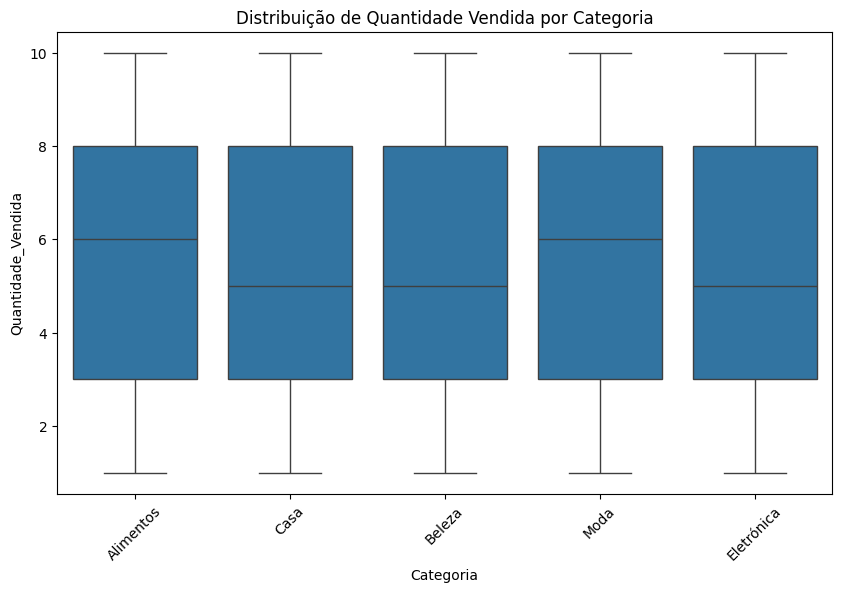

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Categoria', y='Quantidade_Vendida')
plt.title('Distribuição de Quantidade Vendida por Categoria')
plt.xticks(rotation=45)
plt.show()

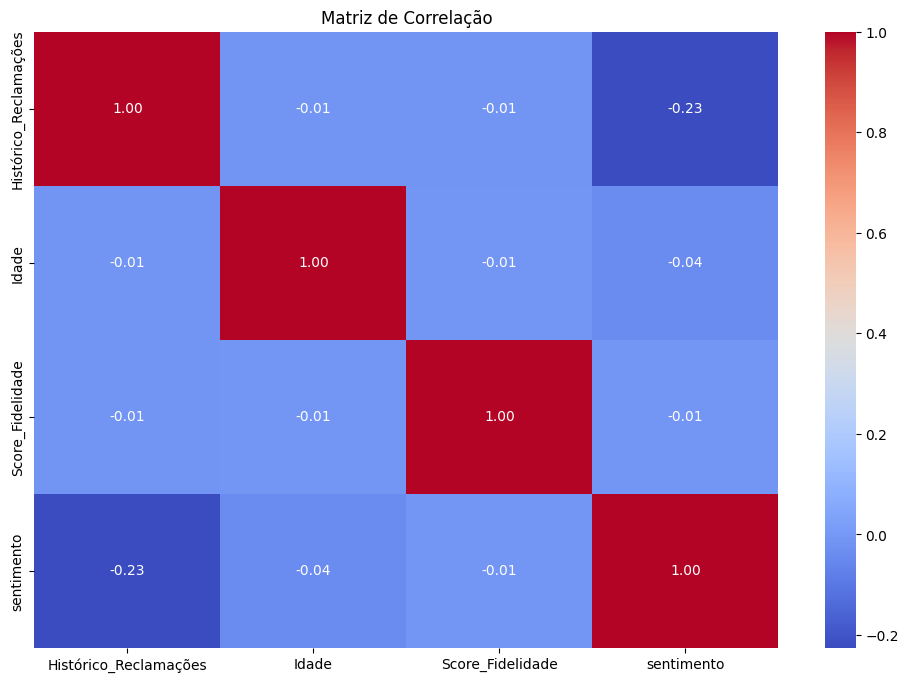

In [214]:
# Matriz de correlação

df_clientes = df_clientes.drop(columns=['Cliente_ID'], errors='ignore')
df_clientes = df_clientes.drop(columns=["Unnamed: 0.1"], errors='ignore')
df_clientes = df_clientes.drop(columns=["Unnamed: 0"], errors='ignore')
# Selecionar apenas as variáveis numéricas
numerical_columns = df_clientes.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_clientes[numerical_columns].corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [203]:
# Visualização: Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

ValueError: could not convert string to float: 'Alimentos'

<Figure size 1000x600 with 0 Axes>

In [192]:
# Filtrar os dados da categoria "Alimentos"
alimentos_dados = df[(df['Categoria'] == 'Alimentos')]

# Ordenar pelo consumo de energia
alimentos_ordenados_energia = alimentos_dados.sort_values(by='Consumo_Energia_kWh', ascending=False)

# Exibir os resultados
print(alimentos_ordenados_energia[["País_Fabricante",'Produto', 'Consumo_Energia_kWh','Consumo_Agua_Litros','Emissao_Gases_CO2e_kg']])


     País_Fabricante      Produto  Consumo_Energia_kWh  Consumo_Agua_Litros  \
5057          Itália    Cerveja 2                 2.93                 0.65   
7437          França    Cerveja 1                 2.92                 0.11   
897         Alemanha    Cerveja 3                 2.92                 0.23   
896         Alemanha    Cerveja 3                 2.92                 0.23   
6140          Itália    Cerveja 3                 2.91                 0.15   
...              ...          ...                  ...                  ...   
1242        Portugal  Chocolate 1                 0.10                 0.13   
1243        Portugal  Chocolate 1                 0.10                 0.13   
1244        Portugal  Chocolate 1                 0.10                 0.13   
1245        Portugal  Chocolate 1                 0.10                 0.13   
592         Portugal       Água 2                 0.10                 0.11   

      Emissao_Gases_CO2e_kg  
5057                 

In [193]:
max_consumo_agua = df[Agua].max()
min_consumo_agua = df[Agua].min()
w1 = 0.2

max_energia = df[Energia].max()
min_energia = df[Energia].min()
w2 = 0.3
max_emissoes = df[co2].max()
min_emissoes = df[co2].min()
w3 = 0.5
print(f"Máximo consumo de água: {max_consumo_agua}")
indiceagua = w1 * ((df[Agua] - min_consumo_agua)/(max_consumo_agua-min_consumo_agua))
indiceenergia = w2 * ((df[Energia] - min_energia)/(max_energia-min_energia))
indiceemissoes = w3 * ((df[co2] - min_emissoes)/(max_emissoes-min_emissoes))
indice = 1-(indiceagua+indiceenergia+indiceemissoes)

# Adicionar o índice como uma coluna ao dataframe
df['Indice'] = indice

Máximo consumo de água: 99.7


In [194]:
categorias_maior_indice = df.groupby('Categoria')['Indice'].mean().sort_values(ascending=False)
print(categorias_maior_indice)

Categoria
Alimentos     0.748250
Beleza        0.739720
Moda          0.739015
Casa          0.710629
Eletrónica    0.483297
Name: Indice, dtype: float64


In [195]:
produtos_mais_poluentes = df.sort_values(by='Indice', ascending=True)
print(produtos_mais_poluentes[[Pais,'Produto', 'Categoria', 'Indice']].head(10))  # Exibe os 10 produtos mais poluentes

     Região_Fabricante       Produto   Categoria    Indice
7982            Berlim  Computador 1  Eletrónica  0.126915
7981            Berlim  Computador 1  Eletrónica  0.126915
7980            Berlim  Computador 1  Eletrónica  0.126915
7983            Berlim  Computador 1  Eletrónica  0.126915
7979            Berlim  Computador 1  Eletrónica  0.126915
5279              Faro   Televisão 2  Eletrónica  0.138890
8426          Marselha   Televisão 2  Eletrónica  0.147912
8427          Marselha   Televisão 2  Eletrónica  0.147912
7794           Nápoles  Computador 2  Eletrónica  0.150410
7793           Nápoles  Computador 2  Eletrónica  0.150410


In [196]:
df_novo = 

SyntaxError: invalid syntax (3262360383.py, line 1)

In [ ]:
df_ordenado = df.sort_values(by='indice', ascending=False)
print(df_ordenado)

KeyError: 'indice'